<a href="https://colab.research.google.com/github/axuereb/ArtofStatistics/blob/master/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Visualization Examples in Python**

---



Version: 1.0

Prepared by: Jian Wu, PhD, State Street (USA)

Updated and Maintained by: [QuantUniversity](https://www.quantuniversity.com)

For support or additional information, email us at : professionallearning@cfainstitute.org

*Copyright 2020 CFA Institute*

## NOTE: This section to be appended after getting info from CFA Institute


---




## How to run this notebook?
This notebook is *view only* and uses Google Colab to run. To **run this Colab notebook**, either:

- **Make a copy to your Google Drive so you can make local changes:** File > Save a copy in Drive...

- **Run in playground mode:** File > Open in playground mode
- **Download the Jupyter notebook, so you can run it on your computer configured with Jupyter:** File > Download .ipynb

![Progress](https://progress-bar.dev/0/?scale=100&title=Progress&width=960&color=babaca&suffix=% "progress")



In Google colab, many data science packages are pre-installed, so users could import most packages directly in their notebooks.
In this notebook we will use functions from the following packages:

*   Numpy
*   Pandas
*   Seaborn
*   Matplotlib

## Import Packages needed to run

In [ ]:
# Import the packages into your Python environment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

## Download Data
The **DATA_SOURCE_URL** variable shows where to get the data from.

In [ ]:
DATA_SOURCE_URL = 'https://cfa-dataset.s3-us-west-2.amazonaws.com/visualization/data_for_visuals.xlsx'

![progress](https://progress-bar.dev/5/?scale=100&title=Preparation&width=960&color=babaca&suffix=% "progress")

## Part 1
#### **Graph 1**: Histogram Overlaid with Frequency Polygon for Daily Returns of EAA Equity Index

In [ ]:
# Load the Index return sheet from the Excel file into a pandas dataframe
df_ret = pd.read_excel(DATA_SOURCE_URL, sheet_name='EAA_index_ret')
# Explore dataset
df_ret.head(10)

,Date,Index Return
0,2014-01-02,-0.901644
1,2014-01-03,-0.000730
2,2014-01-06,-0.289566
3,2014-01-07,0.609309
4,2014-01-08,-0.021204
5,2014-01-09,0.044270
6,2014-01-10,0.250984
7,2014-01-13,-1.236638
8,2014-01-14,1.042302
9,2014-01-15,0.509295


In [ ]:
# Load the Frequency distribution sheet from the data into pandas dataframe
df_freq = pd.read_excel(DATA_SOURCE_URL, sheet_name='EAA_freq_dist')
# Explore dataset
df_freq.head(10)

,Bin,Mid,Freq,Cumulative Freq
0,-5.0 to -4.0,-4.5,1,1
1,-4.0 to -3.0,-3.5,7,8
2,-3.0 to -2.0,-2.5,23,31
3,-2.0 to -1.0,-1.5,77,108
4,-1.0 to 0.0,-0.5,470,578
5,0.0 to 1.0,0.5,555,1133
6,1.0 to 2.0,1.5,110,1243
7,2.0 to 3.0,2.5,13,1256
8,3.0 to 4.0,3.5,1,1257
9,4.0 to 5.0,4.5,1,1258


Use the sliders to change the width of the bars in the chart.

In [ ]:
# Width of the bar
shrink_param = 0.68 #@param {type:"slider", min:0, max:1, step:0.01}



---




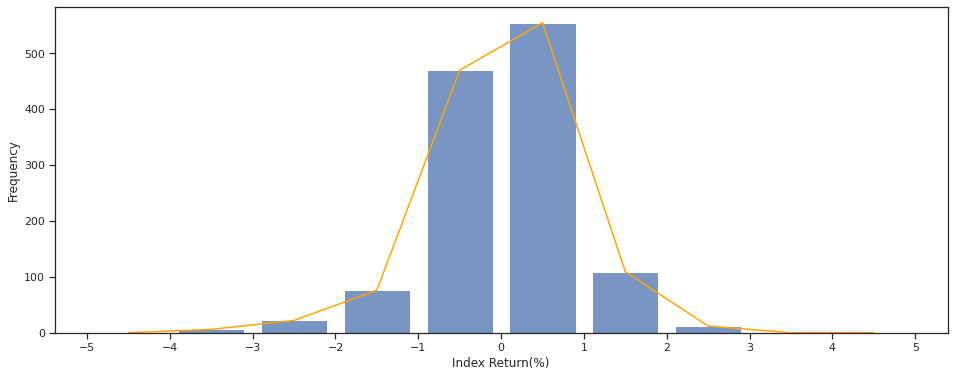

In [ ]:
# Configure and draw a Histogram
plt.figure(figsize=(16, 6))
sns.set(style="ticks")
bins_array =[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
ax=sns.histplot(df_ret['Index Return'], bins=bins_array, kde=False, shrink=shrink_param);
ax.set(xlabel='Index Return(%)', ylabel='Frequency')
ax.set(xticks=bins_array)
# Draw line chart on the same figure
plt.plot(df_freq.Mid, df_freq.Freq, color='orange')
fig1a = ax.get_figure()
fig1a.savefig('Histogram Overlaid with Frequency Polygon.png')

![progress](https://progress-bar.dev/10/?scale=100&title=Graph1&width=960&color=babaca&suffix=% "progress")

#### **Graph 2:** Cumulative Absolute Frequency Distribution of Daily Returns of EAA Equity Index

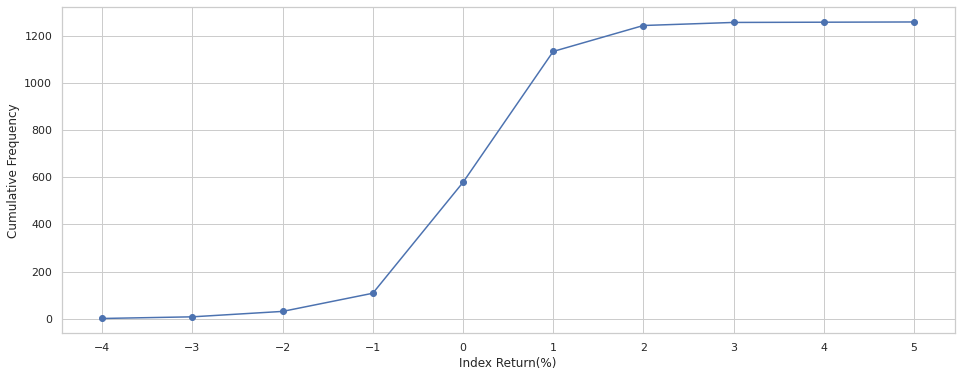

In [ ]:
sns.set(style="whitegrid")
fig1b = plt.figure(figsize=(16, 6))
plt.plot(df_freq.Mid+0.5, df_freq['Cumulative Freq'], 'o-')
plt.xlabel('Index Return(%)')
plt.ylabel('Cumulative Frequency')
a=plt.xticks(bins_array[1:])
fig1b.savefig('Cumulative Absolute Frequency Distribution.png')

![progress](https://progress-bar.dev/20/?scale=100&title=Graph2&width=960&color=babaca&suffix=% "progress")

## Part 2: Use bar charts to visualize the categorical infomation in datasets.

#### **Graph 3:** Frequency by Sector and Level of Market Capitalization in a Stacked Bar Chart

In [ ]:
# Load the sector size sheet into pandas
df_sector_size = pd.read_excel(DATA_SOURCE_URL, sheet_name='Sector_Size_Freq', index_col=0)
# Explore dataset
df_sector_size.head(10)

,Small Cap,Mid Cap,Large Cap
Communication Services,55,35,20
Consumer Staples,50,30,30
Energy,175,95,20
Health Care,275,105,55
Utilities,20,25,10


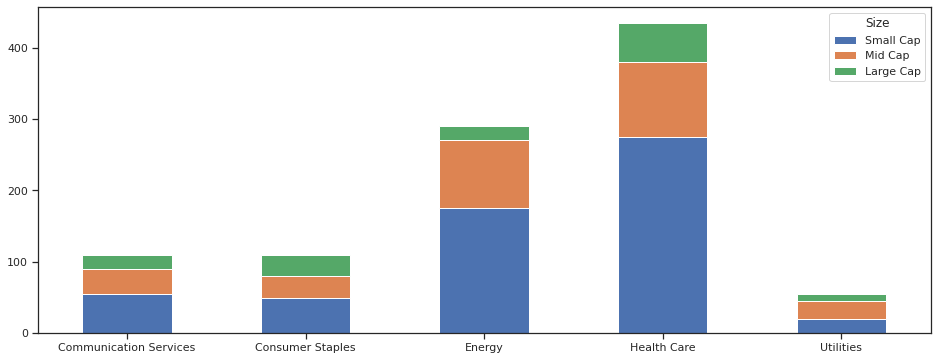

In [ ]:
# Draw Stacked Bar Chart
ct=df_sector_size.reindex(columns=['Small Cap', 'Mid Cap', 'Large Cap'])
ax=ct.plot.bar(stacked=True, figsize=(16,6))
plt.legend(title='Size')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
fig2a = ax.figure
fig2a.savefig('Frequency by Sector and Level of Market Capitalization in a Stacked Bar Chart.png', bbox_inches='tight')

![progress](https://progress-bar.dev/30/?scale=100&title=Graph3&width=960&color=babaca&suffix=% "progress")

#### **Graph 4:**
##### Frequency by Sector for Stocks in a Portfolio

In [ ]:
# Stack to exhange the columns and index
df_sector_size_1=df_sector_size.stack().reset_index().rename(columns={'level_0':'Sector', 'level_1':'Size', 0:'Frequency'})
# Explore dataset
df_sector_size_1.head(10)

,Sector,Size,Frequency
0,Communication Services,Small Cap,55
1,Communication Services,Mid Cap,35
2,Communication Services,Large Cap,20
3,Consumer Staples,Small Cap,50
4,Consumer Staples,Mid Cap,30
5,Consumer Staples,Large Cap,30
6,Energy,Small Cap,175
7,Energy,Mid Cap,95
8,Energy,Large Cap,20
9,Health Care,Small Cap,275


In [ ]:
# Replica records based on frequency to simulate real data
df_sector_size_2 =df_sector_size_1.loc[np.repeat(df_sector_size_1.index.values, df_sector_size_1.Frequency)]
# Explore dataset
df_sector_size_2.sample(10)

,Sector,Size,Frequency
6,Energy,Small Cap,175
6,Energy,Small Cap,175
9,Health Care,Small Cap,275
7,Energy,Mid Cap,95
13,Utilities,Mid Cap,25
9,Health Care,Small Cap,275
6,Energy,Small Cap,175
7,Energy,Mid Cap,95
9,Health Care,Small Cap,275
6,Energy,Small Cap,175


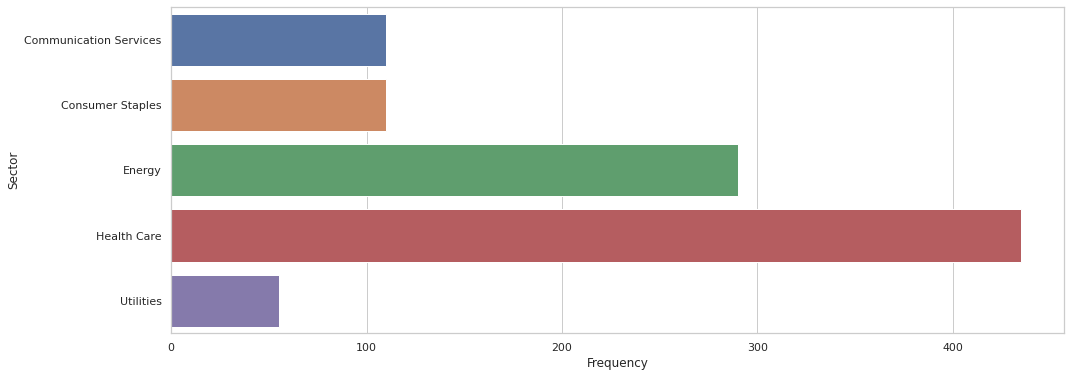

In [ ]:
# Draw the horizontal bar chart
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
ax=sns.countplot(y='Sector', data=df_sector_size_2, orient='h')
ax.set(xlabel='Frequency')
fig2b = ax.get_figure()
fig2b.savefig('Frequency by Sector for Stocks in a Portfolio.png', bbox_inches='tight')

![progress](https://progress-bar.dev/35/?scale=100&title=Graph4&width=960&color=babaca&suffix=% "progress")

#### **Graph 5:**
#### Frequency by Sector and Level of Market Capitalization for Stocks in a Portfolio

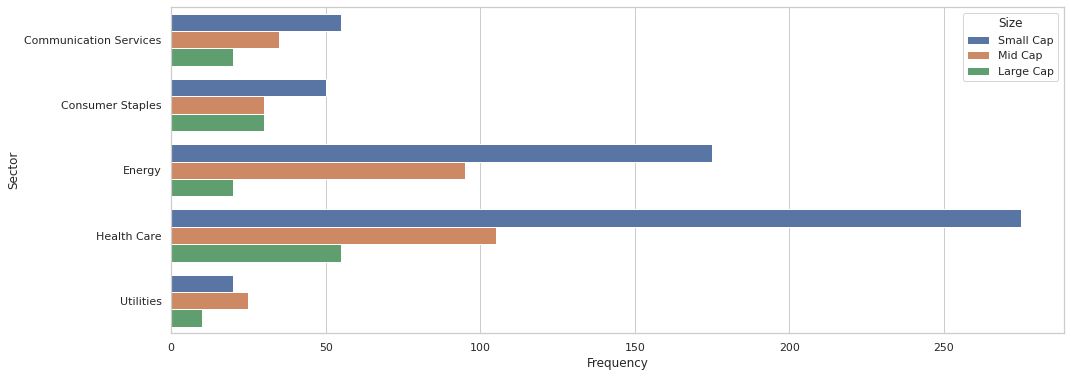

In [ ]:
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
ax=sns.countplot(y='Sector', hue='Size', data=df_sector_size_2, orient='h')
ax.set(xlabel='Frequency')
fig2c = ax.get_figure()
fig2c.savefig('Frequency by Sector and Level of Market Capitalization for Stocks in a Portfolio.png', bbox_inches='tight')

![progress](https://progress-bar.dev/40/?scale=100&title=Graph5&width=960&color=babaca&suffix=% "progress")

## Part 3
#### **Graph 6:** 
Word Cloud Visualizing Excerpted Text in MDA Section in Form 10-Q of Apple Inc.
In this example, we will show how to visualize the words frequency in text files.

In [ ]:
# Downlaod the sample text data
!wget -O apple.txt https://cfa-dataset.s3-us-west-2.amazonaws.com/visualization/apple.txt
# Load data
file_content=open ('apple.txt').read()
# Explore data
file_content

--2021-01-11 04:29:25--  https://cfa-dataset.s3-us-west-2.amazonaws.com/visualization/apple.txt
Resolving cfa-dataset.s3-us-west-2.amazonaws.com (cfa-dataset.s3-us-west-2.amazonaws.com)... 52.218.216.113
Connecting to cfa-dataset.s3-us-west-2.amazonaws.com (cfa-dataset.s3-us-west-2.amazonaws.com)|52.218.216.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33621 (33K) [text/plain]
Saving to: ‘apple.txt’

apple.txt           100%[===================>]  32.83K  --.-KB/s    in 0.04s   

2021-01-11 04:29:26 (893 KB/s) - ‘apple.txt’ saved [33621/33621]



'This section and other parts of this Quarterly Report on Form 10‑Q contain forward-looking statements, within the meaning of the Private Securities Litigation Reform Act of 1995, that involve risks and uncertainties. Forward-looking statements provide current expectations of future events based on certain assumptions and include any statement that does not directly relate to any historical or current fact. Forward-looking statements can also be identified by words such as “future,” “anticipates,” “believes,” “estimates,” “expects,” “intends,” “plans,” “predicts,” “will,” “would,” “could,” “can,” “may,” and similar terms. Forward-looking statements are not guarantees of future performance and the Company’s actual results may differ significantly from the results discussed in the forward-looking statements. Factors that might cause such differences include, but are not limited to, those discussed in Part II, Item 1A of this Form 10-Q under the heading “Risk Factors,” which are incorpora

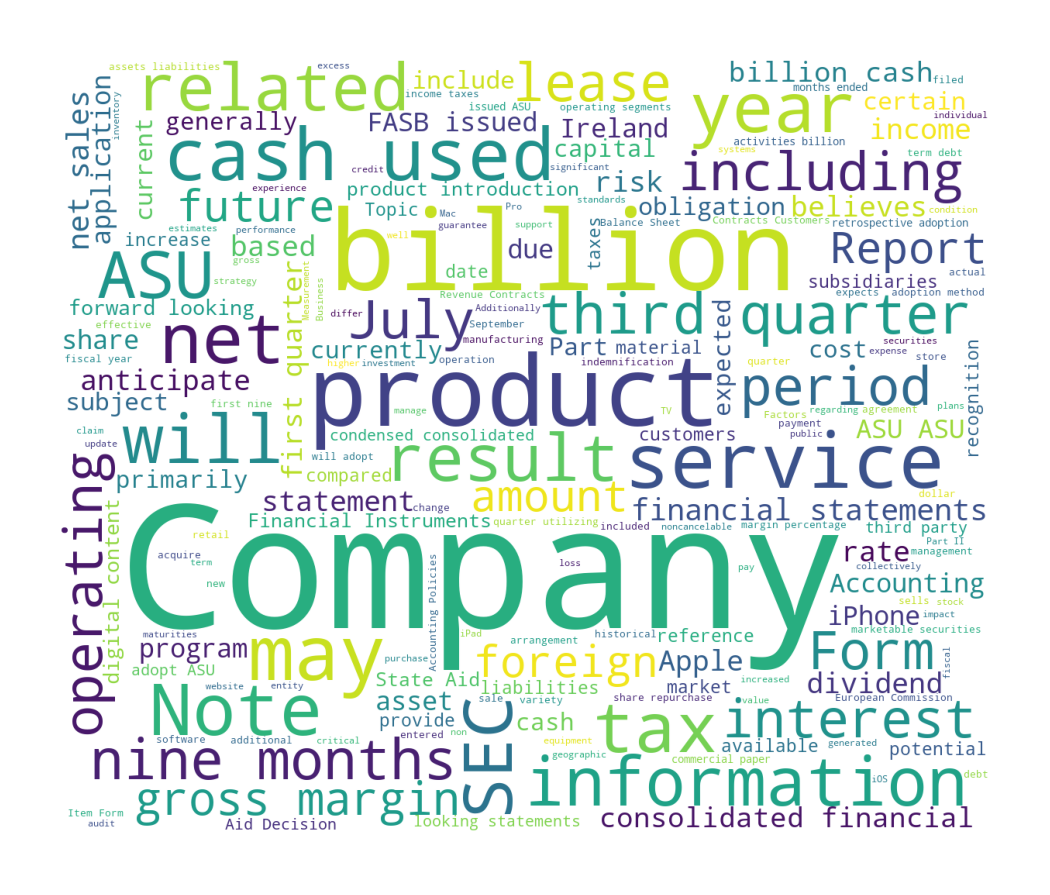

In [ ]:
# Generate the figure automatically using wordcloud package
wordcloud = WordCloud(stopwords = STOPWORDS,
                            background_color = 'white',
                            width = 1200,
                            height = 1000,
                            ).generate(file_content)

# Show the figure in notebook, using matplotlib
fig3=plt.figure(figsize=(2,2), dpi=600)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig3.savefig('Word Cloud.png')

In [ ]:
#@title Exercise: Double click and uncomment to try a WordCloud for another dataset
# Uncomment below code to download the data and run next cell for WorldCloud
# !wget -O 10Q_management_discussion.txt https://cfa-dataset.s3-us-west-2.amazonaws.com/visualization/10Q_management_discussion.txt
# file_content=open ('10Q_management_discussion.txt').read()
# file_content

![progress](https://progress-bar.dev/50/?scale=100&title=Graph6&width=960&color=babaca&suffix=% "progress")

## Part 4
#### **Graph 7:**
Daily Closing Prices of ABC Inc.’s Stock and Its Sector Index
Here, we illustrate drawing two line charts with different y axes.

In [ ]:
# Load the data
df_price =pd.read_excel(DATA_SOURCE_URL, sheet_name='stock_price')
# Explore data
df_price.head(10)

,Unnamed: 0,Price ($),Sector Index
0,Day 1,57.211589,6234.17
1,Day 2,58.259736,6256.60
2,Day 3,58.635848,6333.58
3,Day 4,56.193812,6310.73
4,Day 5,54.781108,6334.43
5,Day 6,54.260300,6332.81
6,Day 7,56.877727,6379.92
7,Day 8,54.738144,6390.94
8,Day 9,52.419000,6359.63
9,Day 10,50.135696,6391.64


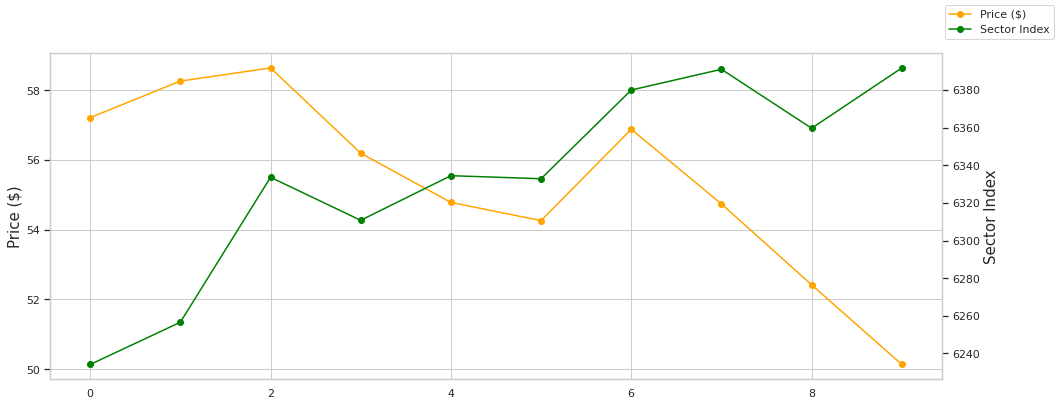

In [ ]:
# Draw two line charts on the same graph
sns.set(style="whitegrid")
ax = df_price.plot( y='Price ($)',  marker='o', legend=False, c='orange', figsize=(16,6))
ax2 = ax.twinx()
sns.set(style="white")
df_price.plot( y='Sector Index', marker='o', ax=ax2, legend=False, c='green')
ax.figure.legend()
ax.set_ylabel('Price ($)', fontsize=15)
ax2.set_ylabel('Sector Index', fontsize=15)
ax.figure.savefig('line_chart_double_.png',  bbox_inches='tight')

![progress](https://progress-bar.dev/60/?scale=100&title=Graph7&width=960&color=babaca&suffix=% "progress")

## Part 5
**Graph 8**
#### Quarterly Revenue and Earnings Per Share of ABC Incorporated
Combining line chart and scatter chart together, to view trend by line chart and emphasize value by scatter chart.

In [ ]:
# Load the data
df_rev_dvd =pd.read_excel(DATA_SOURCE_URL, sheet_name='rev_dvd')
# Convert negative data to positive and store as a new column
df_rev_dvd['EPS_abs'] = df_rev_dvd['EPS'].abs()
# Explore data
df_rev_dvd.head(10)

,Quarter,Revenue ($M),EPS,Dividends,EPS_abs
0,Q1 Year 1,3784,1.37,0.25,1.37
1,Q2 Year 1,4236,1.78,0.25,1.78
2,Q3 Year 1,4187,-3.38,0.25,3.38
3,Q4 Year 1,3889,-8.66,0.25,8.66
4,Q1 Year 2,4097,-0.34,1.00,0.34
5,Q2 Year 2,5905,3.89,1.25,3.89
6,Q3 Year 2,4997,-2.88,1.25,2.88
7,Q4 Year 2,4389,-3.98,1.25,3.98


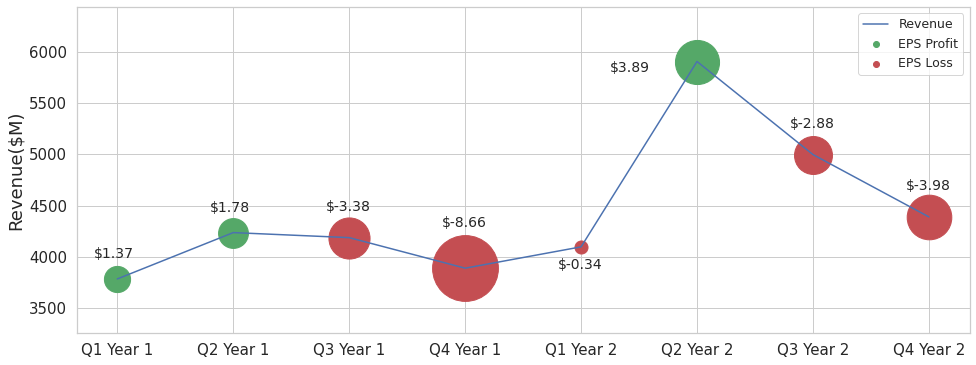

In [ ]:
# Draw the line chart
sns.set(style="whitegrid")
fig5=plt.figure(figsize=(16,6))
plt.plot(df_rev_dvd.index, df_rev_dvd['Revenue ($M)'], '-', label='Revenue')
c_array = ['g' if i>=0 else 'r' for i in df_rev_dvd.EPS  ]
plt.ylabel('EPS($)')

# Move the tooltip a bit to avoid covering the scatter
shift =[(-.2, +200), (-.2, +200), (-.2, +260), (-.2, +400), (-.2, -220), (-.75, -100), (-.2, +260), (-.2, +260)]
for i in range(len(c_array)):
    x = df_rev_dvd.index[i]
    y = df_rev_dvd.loc[i, 'Revenue ($M)']
    plt.scatter(x, y , s=df_rev_dvd.EPS_abs[i]*500, label='', alpha=1, color=c_array[i])
    plt.text(x+shift[i][0], y+shift[i][1], '$'+str(df_rev_dvd.EPS[i]), fontsize=14)

# Legend control
plt.scatter(df_rev_dvd.index.values[5], df_rev_dvd.loc[5, 'Revenue ($M)'], c='g', label='EPS Profit', alpha=1)
plt.scatter(df_rev_dvd.index.values[3], df_rev_dvd.loc[3, 'Revenue ($M)'], c='r', label='EPS Loss', alpha=1)
plt.legend(fontsize=12.5)
# Zoom in the figure to center
plt.margins(0.05,0.25)
# Add label
ax=plt.gca()
ax.set_ylabel('Revenue($M)', fontsize=18)
ax.set_xticklabels([''] + df_rev_dvd['Quarter'].tolist())
plt.tick_params(labelsize=15)
fig5.savefig('Quarterly Revenue and EPS of ABC Incorporated.png')

![progress](https://progress-bar.dev/70/?scale=100&title=Part8&width=960&color=babaca&suffix=% "progress")

## Part 6
**Graph 9:**
#### Scatter Plot of Index Return Comparison
Scatter plot enables visualizing the relationship between two numerical variables.

In [ ]:
# Define the loop up map for abbreviation of stocks
stock_map = {'SPY':'S&P 500', 
              'XLY':'Consumer Discretionary Sector', 
              'XLP':'Consumer Staples Sector', 
              'XLE':'Energy Sector', 
              'XLF':'Financial Sector', 
              'XLV':'Health Care Sector', 
              'XLI':'Industrial Sector', 
              'XLB':'Materials Sector', 
              'XLK':'Technology Sector', 
              'XLU':'Utilities Sector', 
              'AAPL':'Apple Inc'}

In [ ]:
#@title Select the two stocked to be compared
stock1 = 'SPY' #@param ['SPY', 'XLY', 'XLP', 'XLE', 'XLF', 'XLV', 'XLI', 'XLB', 'XLK', 'XLU', 'AAPL']
stock2 = 'XLK' #@param ['SPY', 'XLY', 'XLP', 'XLE', 'XLF', 'XLV', 'XLI', 'XLB', 'XLK', 'XLU', 'AAPL']
if stock1 == stock2:
  raise Exception('Please select two different stock')

In [ ]:
# Load data
df_ret_all =pd.read_excel(DATA_SOURCE_URL, sheet_name='sector_ret')
df_ret = df_ret_all[stock_map.keys()]
df_ret=df_ret.iloc[-60:, :]
# Select only required data and format
df_ret_select = df_ret[[stock1, stock2]].copy()
df_ret_select = df_ret_select.rename(columns={stock1: stock_map[stock1], stock2: stock_map[stock2]})
# Explote dataset
df_ret_select.head(10)

,S&P 500,Technology Sector
132,-3.5248,-2.5741
133,4.5516,4.3940
134,0.8311,0.4333
135,0.6951,0.2751
136,2.3206,3.7586
137,2.0633,1.8700
138,-1.3438,1.6949
139,3.9463,3.2821
140,-1.3791,-0.5167
141,2.3551,1.6040


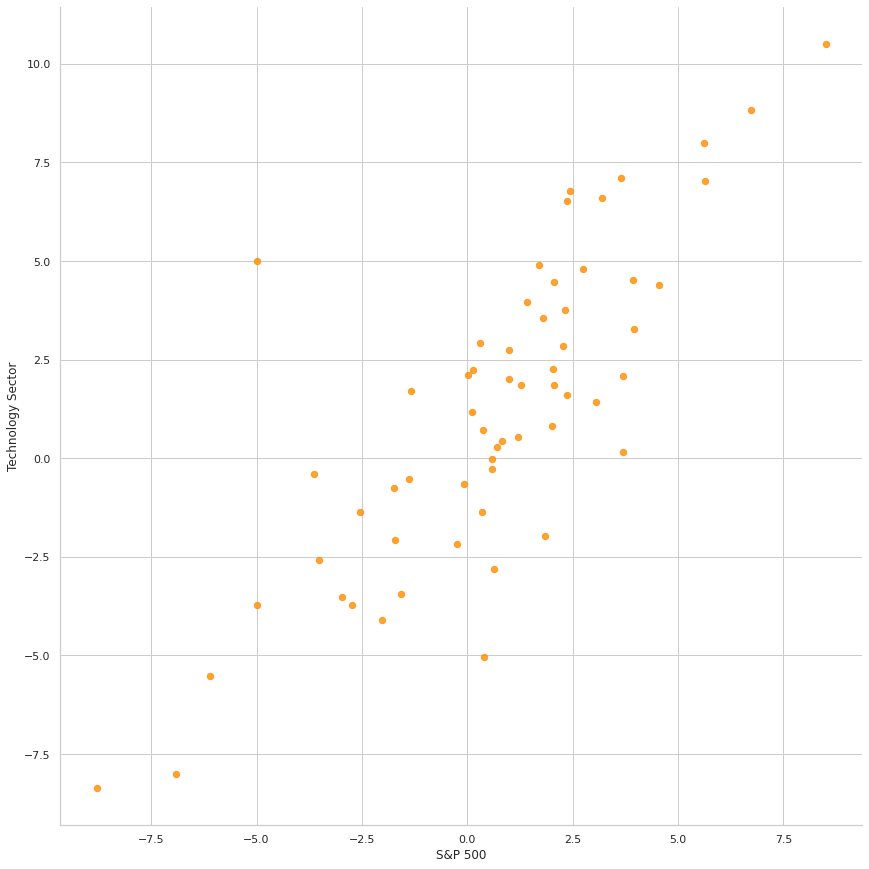

In [ ]:
# Plot the scatterplot
sns.set(style="whitegrid")
ax=sns.lmplot(x=stock_map[stock1], # Horizontal axis
            y=stock_map[stock2], # Vertical axis
            data=df_ret_select, # Data source
            fit_reg=False, # Don't fix a regression line           
            scatter_kws={'color': 'darkorange', 
              "marker": 'o', # Set marker style
              "s":40},
            height=12) # S marker size
ax.savefig('Exhibit 30 Scatter Plot of {} Index Return vs. {} Index Return.png'.format(stock_map[stock1], stock_map[stock2]))

![progress](https://progress-bar.dev/80/?scale=100&title=Graph9&width=960&color=babaca&suffix=% "progress")

## Part 7
**Graph 10:**
#### Pairwise Scatter Plot Matrix 


In [ ]:
# Load and select the sector returns dataset
df_ret_all =pd.read_excel(DATA_SOURCE_URL, sheet_name='sector_ret')
list_col = ['SPY', 'XLK', 'XLU', 'XLF']
df_ret = df_ret_all[list_col]
# Replace column names by full name using the above stock_map
for col in list_col:
  df_ret=df_ret.rename(columns={col:stock_map[col]})
df_ret=df_ret.iloc[-60:, :]
# Explore dataset
df_ret.head(10)

,S&P 500,Technology Sector,Utilities Sector,Financial Sector
132,-3.5248,-2.5741,2.9760,-3.6597
133,4.5516,4.3940,3.4527,3.0389
134,0.8311,0.4333,3.3444,3.3301
135,0.6951,0.2751,4.2209,-1.7010
136,2.3206,3.7586,-1.0877,1.5027
137,2.0633,1.8700,4.4469,2.4193
138,-1.3438,1.6949,-6.8007,-1.4512
139,3.9463,3.2821,4.9212,4.2392
140,-1.3791,-0.5167,-1.8798,-0.4008
141,2.3551,1.6040,8.0304,2.8917


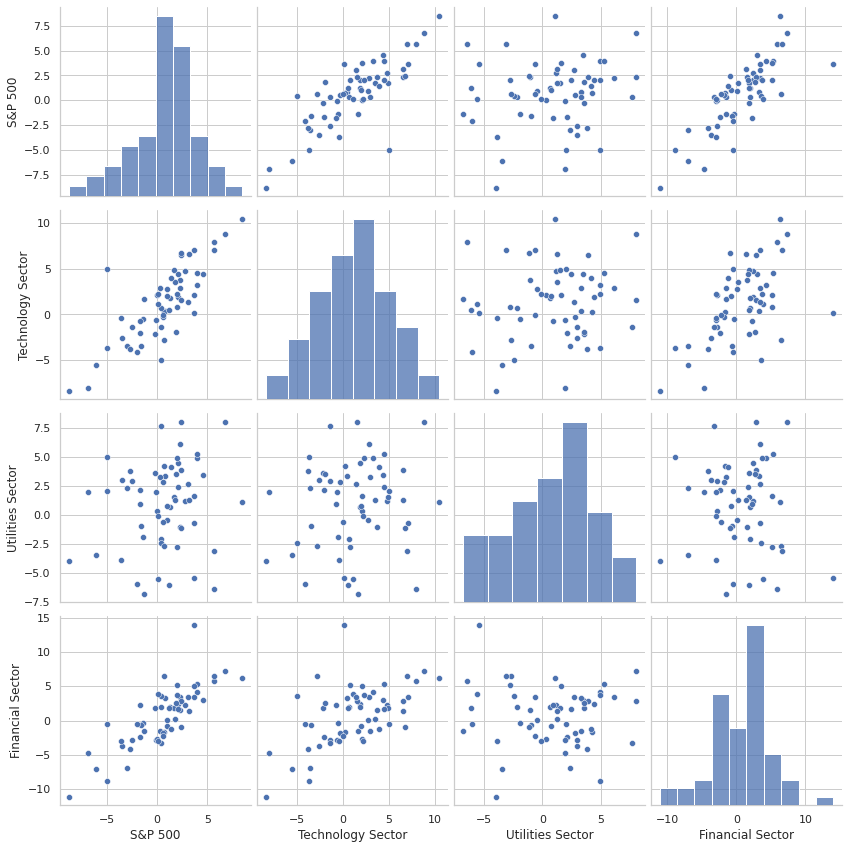

In [ ]:
# Draw charts
sns.set(style="whitegrid")
fig7=sns.pairplot(df_ret, height=3)
fig7.savefig('Pairwise Scatter Plot Matrix.png')

![progress](https://progress-bar.dev/90/?scale=100&title=Graph10&width=960&color=babaca&suffix=% "progress")

## Part 8
**Graph 11:** 
#### Frequencies by Sector and Market Capitalization in a Heatmap

In [ ]:
# Load the data
df_sector_size_freq =pd.read_excel(DATA_SOURCE_URL, sheet_name='Heatmap_old', index_col=0)
# Explore data
df_sector_size_freq.head(10)

,Small Cap,Mid Cap,Large Cap
Communication Services,21,43,83
Consumer Staples,36,81,45
Energy,99,95,29
Health Care,4,8,18
Utilities,81,37,58


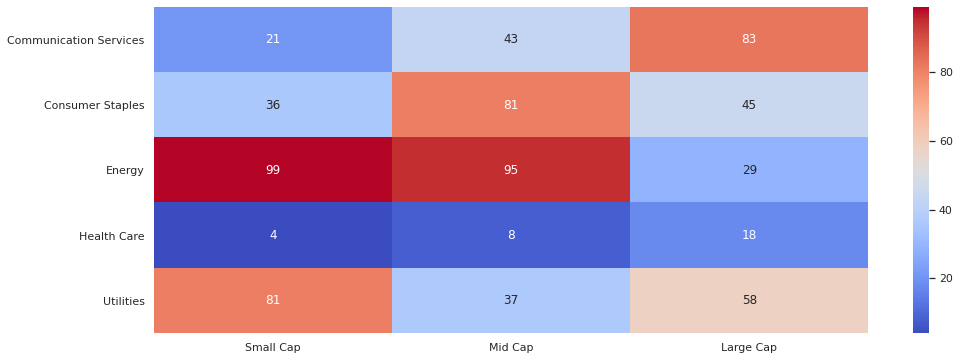

In [ ]:
# Draw charts
plt.figure(figsize=(16, 6))
fig8= sns.heatmap(df_sector_size_freq, annot=True, cmap='coolwarm')
fig8.figure.savefig('Frequencies by Sector and Market Capitalization in Heatmap.png',  bbox_inches='tight')

![progress](https://progress-bar.dev/100/?scale=100&title=Graph11&width=960&color=babaca&suffix=% "progress")

## Reference:
### CFA Refresher Reading
1.   [Organizing, Visualizing, and Describing Data](https://www.cfainstitute.org/en/membership/professional-development/refresher-readings/organizing-visualizing-and-describing-data)

> Summary:

> * Explore data visualization using Python in our member-only module, eligible for up to 17.5 PL credits.


---

![progress](https://progress-bar.dev/100/?scale=100&title=END!&width=980&color=babaca&suffix=% "progress")